### Solution for DFS Question

In [12]:
# Simple function to create the graph as in the practical
def ret_graph():
    return {
        'A': {'B':1, 'C':1, 'D':1},
        'B': {'A':1, 'E':1},
        'C': {'A':1, 'F':1},
        'D': {'A':1, 'F':1},
        'E': {'B':1, 'J':1},
        'F': {'C':1, 'D':1, 'K':1, 'G':1},
        'G': {'F':1, 'I':1},
        'H': {'J':1},
        'I': {'G':1, 'J':1},
        'J': {'H':1, 'K':1},
        'K': {'F':1}
    }

In [13]:
# Change to construct the same graph after removing the edge between I and J

def ret_graph1():
    return {
        'A': {'B':1, 'C':1, 'D':1},
        'B': {'A':1, 'E':1},
        'C': {'A':1, 'F':1},
        'D': {'A':1, 'F':1},
        'E': {'B':1, 'J':1},
        'F': {'C':1, 'D':1, 'K':1, 'G':1},
        'G': {'F':1, 'I':1},
        'H': {'J':1},
        'I': {'G':1},
        'J': {'H':1},
        'K': {'F':1}
    }


In [14]:
# Implementation of depth first search with trace output showing the stack, visited and path 

def dfs_graph(graph, start, dest):                
    visited = []                
    stack = []          
    path = []
    parentDict = {}

    stack.append(start)                  
    visited.append(start)                
    while stack:                         
        curr = stack.pop()
        path.append(curr)
        
        print ("stack",stack) 	
        print ("visited",visited)
        print ("path",path)

        for neigh in graph[curr]:   
            parentDict[neigh] = curr
            if neigh not in visited:       
                visited.append(neigh)     
                stack.append(neigh)	
                if neigh == dest :            
                    print("FOUND:", neigh) 
                    path.append(neigh)
                    print(path)
                    #print ("parentDict",parentDict)
                    return

    print("Not found")

In [15]:
# run the function with the initial variable ()
graph = ret_graph()
dfs_graph(graph, 'A', 'J')

stack []
visited ['A']
path ['A']
stack ['B', 'C']
visited ['A', 'B', 'C', 'D']
path ['A', 'D']
stack ['B', 'C']
visited ['A', 'B', 'C', 'D', 'F']
path ['A', 'D', 'F']
stack ['B', 'C', 'K']
visited ['A', 'B', 'C', 'D', 'F', 'K', 'G']
path ['A', 'D', 'F', 'G']
stack ['B', 'C', 'K']
visited ['A', 'B', 'C', 'D', 'F', 'K', 'G', 'I']
path ['A', 'D', 'F', 'G', 'I']
FOUND: J
['A', 'D', 'F', 'G', 'I', 'J']


### Explaination

#### Basic Implementation and Test with the Original Graph Provided
The implementation of DFS found the destination J and the path  ['A', 'D', 'F', 'G', 'I', 'J']

Observe the intermediate values of the stack and visited nodes list. As the first element put on the stack is the next popped off then DFS goes deeply into the graph. The parentDict data structure shows the parents of every node in the path (it is just for information).

#### Further Explaination
Now we try to run the same algorithm with the changed graph obtained by deleting the edge between I and J. 

This graph looks like this:
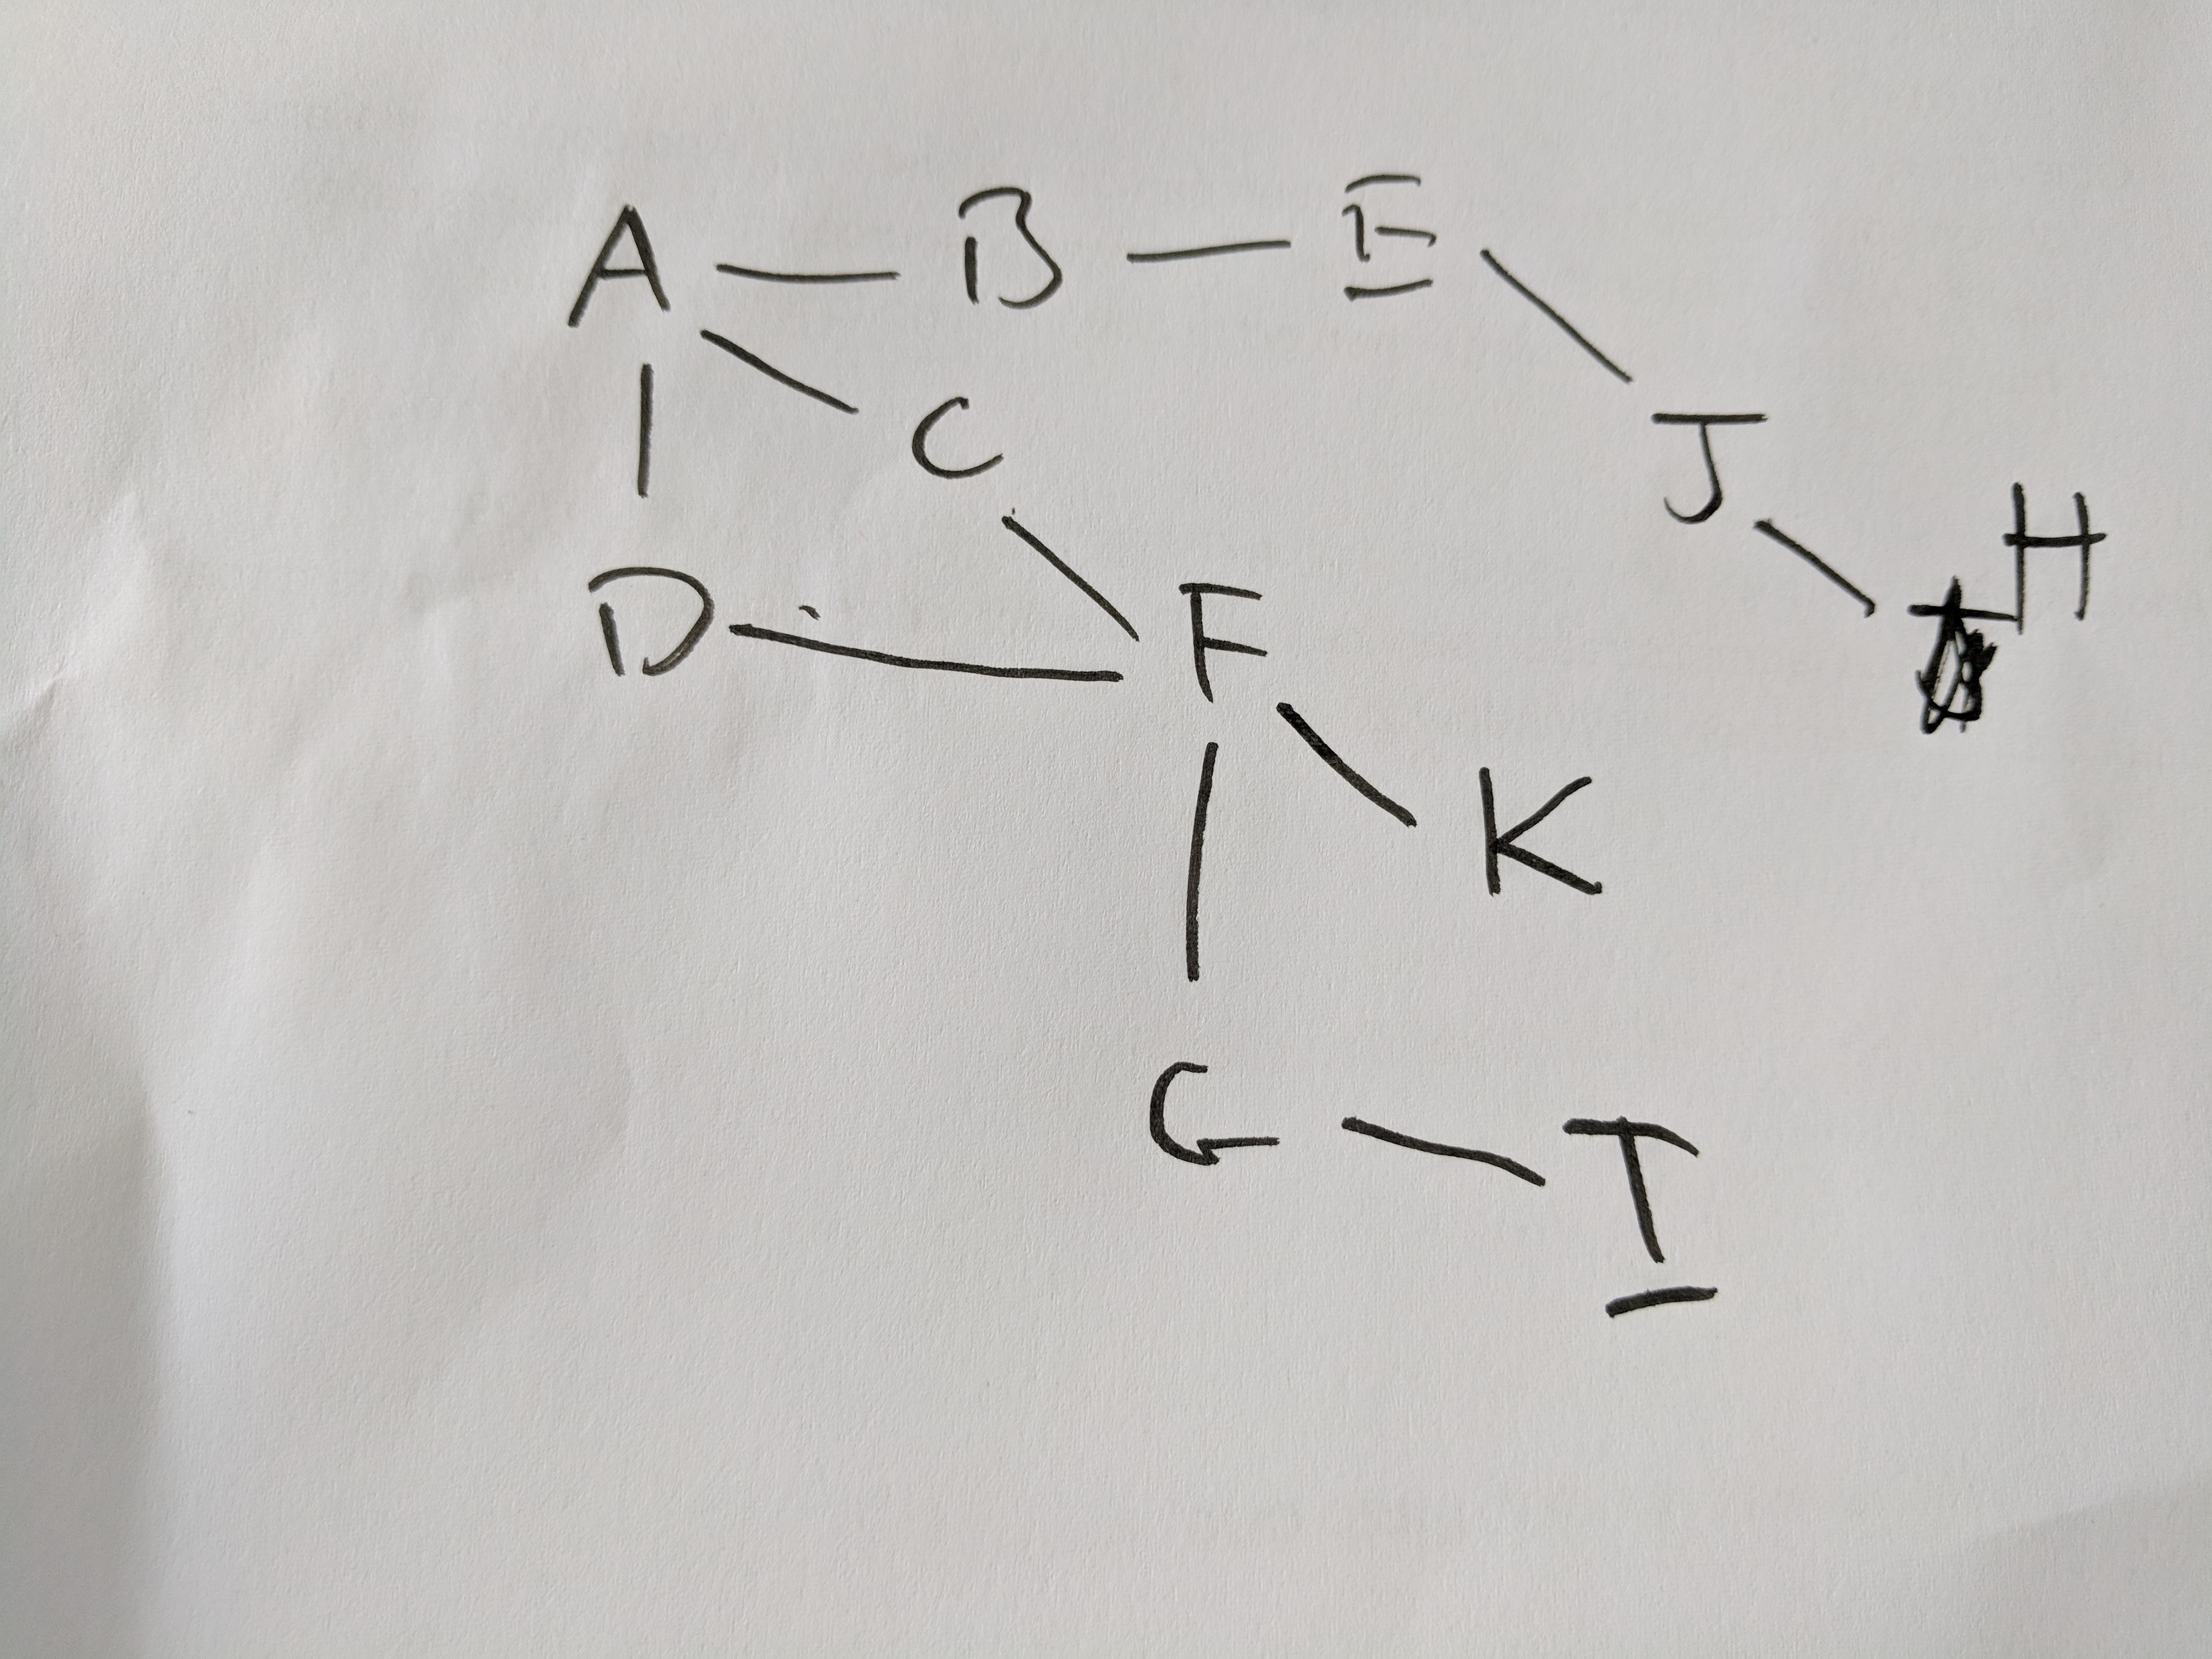



In [16]:
graph = ret_graph1()
dfs_graph(graph, 'A', 'J')

stack []
visited ['A']
path ['A']
stack ['B', 'C']
visited ['A', 'B', 'C', 'D']
path ['A', 'D']
stack ['B', 'C']
visited ['A', 'B', 'C', 'D', 'F']
path ['A', 'D', 'F']
stack ['B', 'C', 'K']
visited ['A', 'B', 'C', 'D', 'F', 'K', 'G']
path ['A', 'D', 'F', 'G']
stack ['B', 'C', 'K']
visited ['A', 'B', 'C', 'D', 'F', 'K', 'G', 'I']
path ['A', 'D', 'F', 'G', 'I']
stack ['B', 'C']
visited ['A', 'B', 'C', 'D', 'F', 'K', 'G', 'I']
path ['A', 'D', 'F', 'G', 'I', 'K']
stack ['B']
visited ['A', 'B', 'C', 'D', 'F', 'K', 'G', 'I']
path ['A', 'D', 'F', 'G', 'I', 'K', 'C']
stack []
visited ['A', 'B', 'C', 'D', 'F', 'K', 'G', 'I']
path ['A', 'D', 'F', 'G', 'I', 'K', 'C', 'B']
stack []
visited ['A', 'B', 'C', 'D', 'F', 'K', 'G', 'I', 'E']
path ['A', 'D', 'F', 'G', 'I', 'K', 'C', 'B', 'E']
FOUND: J
['A', 'D', 'F', 'G', 'I', 'K', 'C', 'B', 'E', 'J']


Here the path was ['A', 'D', 'F', 'G', 'I', 'K', 'C', 'B', 'E', 'J'].

Looking at the picture of the graph above we can see it might have a problem because this path doesn't follow a logical path (e.g. no edge to go from K to C).

The reason for this is because the path that is output also shows backtracking steps. The actual path that DFS followed is: 
- go from A-D-F-G-I, 
- this is a dead end so go back to F and follow F-K
- another dead end so back to the next branch and follow A-C
- finally follow the path A-B-E-J

Thes paths are shown in this picture:
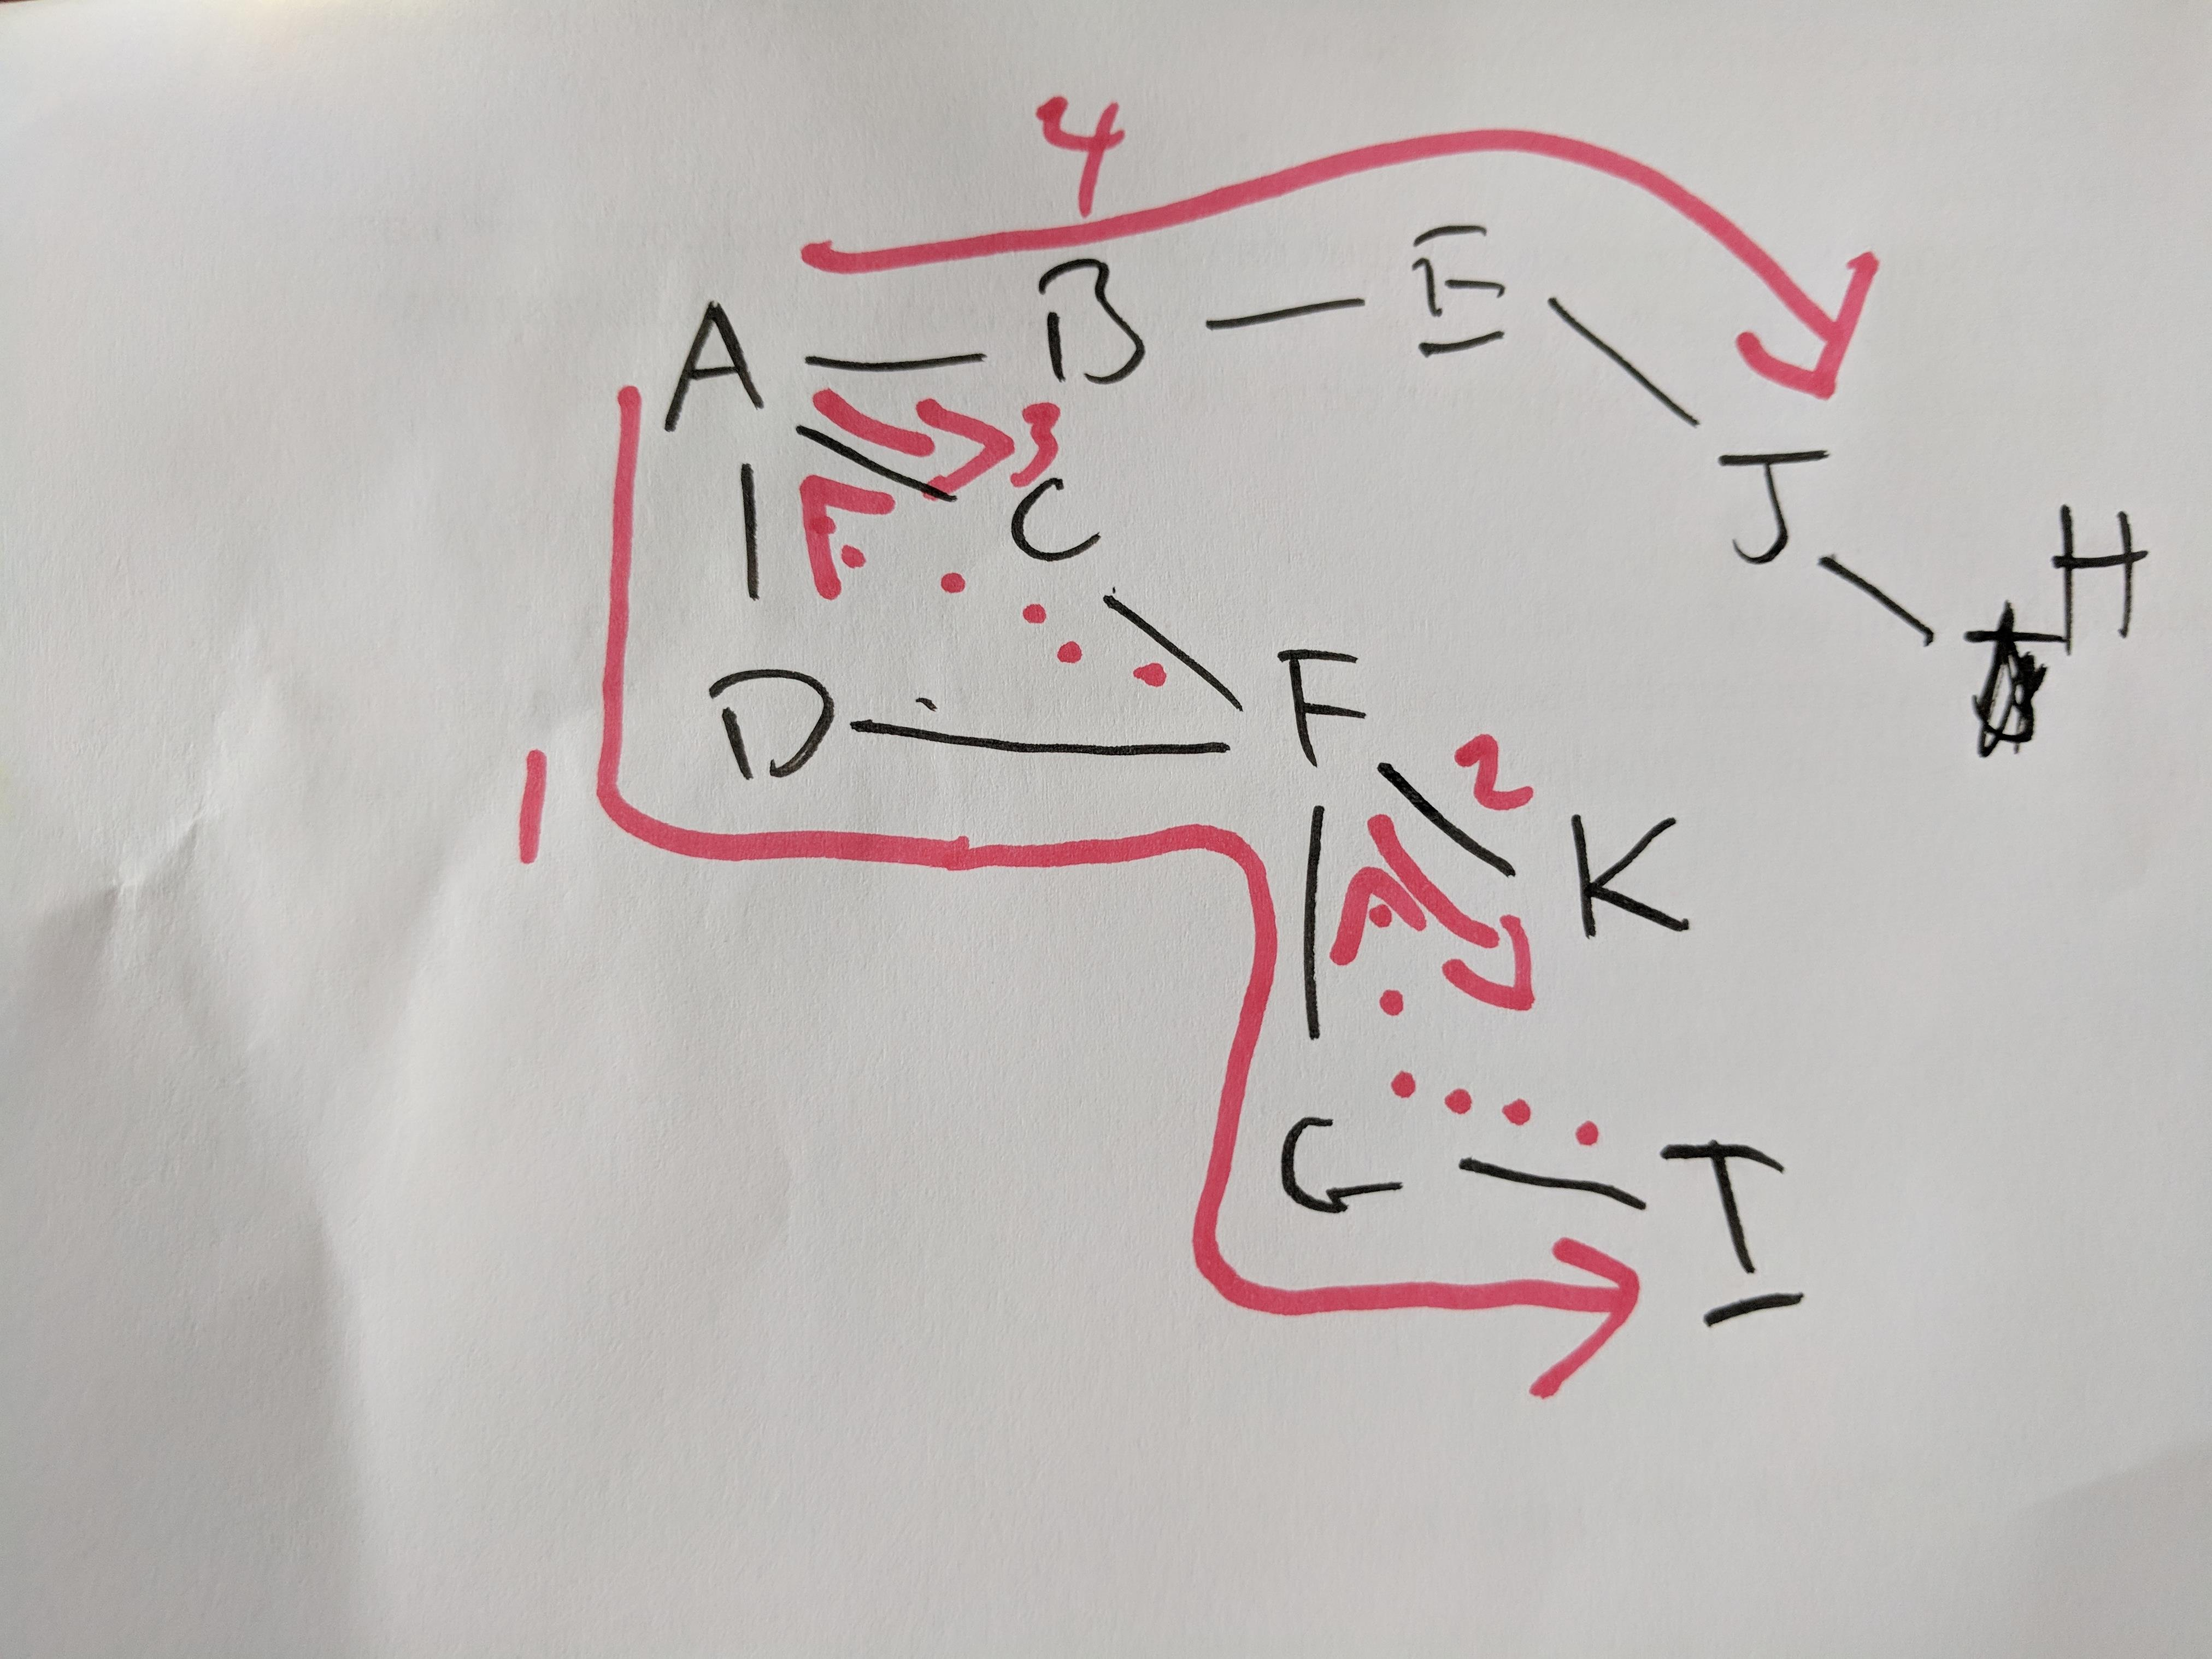


As a further excercise you could try to extend the implementation to only return the final logical path (not to show back tracking steps in the final path that is returned).